In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from agent import Agent

Using device:  cuda:0
Using pretrained model: BreakoutNoFrameskip-v4_10000


[]

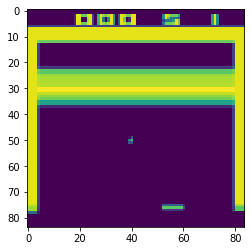

In [2]:
game_name = 'BreakoutNoFrameskip-v4' # 'Breakout-v0' # 'VideoPinball-v0'
device = 'cuda:0'
chkpnt_name = 'BreakoutNoFrameskip-v4_10000' # 'breakoutv4_100_test'
pretrained_name = 'BreakoutNoFrameskip-v4_10000' # 'breakoutv4_100_test'
verbosity = 0

agent = Agent(game_name, device, chkpnt_name, pretrained_name, verbosity)

plt.imshow(agent.sanity_check_screen())
plt.plot()

In [3]:
agent.eps_decay = 1
metrics = agent.train()

Episode  0
Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20
Episode  21
Episode  22
Episode  23
Episode  24
Episode  25
Episode  26
Episode  27
Episode  28
Episode  29
Episode  30
Episode  31
Episode  32
Episode  33
Episode  34
Episode  35
Episode  36
Episode  37
Episode  38
Episode  39
Episode  40
Episode  41
Episode  42
Episode  43
Episode  44
Episode  45
Episode  46
Episode  47
Episode  48
Episode  49
Saving model and metrics ...
Episode  50
Episode  51
Episode  52
Episode  53
Episode  54
Episode  55
Episode  56
Episode  57
Episode  58
Episode  59
Episode  60
Episode  61
Episode  62
Episode  63
Episode  64
Episode  65
Episode  66
Episode  67
Episode  68
Episode  69
Episode  70
Episode  71
Episode  72
Episode  73
Episode  74
Episode  75
Episode  76
Episode  77
Episode  78
Episode  79
Episode  80
Episode  

Episode  612
Episode  613
Episode  614
Episode  615
Episode  616
Episode  617
Episode  618
Episode  619
Episode  620
Episode  621
Episode  622
Episode  623
Episode  624
Episode  625
Episode  626
Episode  627
Episode  628
Episode  629
Episode  630
Episode  631
Episode  632
Episode  633
Episode  634
Episode  635
Episode  636
Episode  637
Episode  638
Episode  639
Episode  640
Episode  641
Episode  642
Episode  643
Episode  644
Episode  645
Episode  646
Episode  647
Episode  648
Episode  649
Saving model and metrics ...
Episode  650
Episode  651
Episode  652
Episode  653
Episode  654
Episode  655
Episode  656
Episode  657
Episode  658
Episode  659
Episode  660
Episode  661
Episode  662
Episode  663
Episode  664
Episode  665
Episode  666
Episode  667
Episode  668
Episode  669
Episode  670
Episode  671
Episode  672
Episode  673
Episode  674
Episode  675
Episode  676
Episode  677
Episode  678
Episode  679
Episode  680
Episode  681
Episode  682
Episode  683
Episode  684
Episode  685
Episode  

Episode  1201
Episode  1202
Episode  1203
Episode  1204
Episode  1205
Episode  1206
Episode  1207
Episode  1208
Episode  1209
Episode  1210
Episode  1211
Episode  1212
Episode  1213
Episode  1214
Episode  1215
Episode  1216
Episode  1217
Episode  1218
Episode  1219
Episode  1220
Episode  1221
Episode  1222
Episode  1223
Episode  1224
Episode  1225
Episode  1226
Episode  1227
Episode  1228
Episode  1229
Episode  1230
Episode  1231
Episode  1232
Episode  1233
Episode  1234
Episode  1235
Episode  1236
Episode  1237
Episode  1238
Episode  1239
Episode  1240
Episode  1241
Episode  1242
Episode  1243
Episode  1244
Episode  1245
Episode  1246
Episode  1247
Episode  1248
Episode  1249
Saving model and metrics ...
Episode  1250
Episode  1251
Episode  1252
Episode  1253
Episode  1254
Episode  1255
Episode  1256
Episode  1257
Episode  1258
Episode  1259
Episode  1260
Episode  1261
Episode  1262
Episode  1263
Episode  1264
Episode  1265
Episode  1266
Episode  1267
Episode  1268
Episode  1269
Episo

Episode  1764
Episode  1765
Episode  1766
Episode  1767
Episode  1768
Episode  1769
Episode  1770
Episode  1771
Episode  1772
Episode  1773
Episode  1774
Episode  1775
Episode  1776
Episode  1777
Episode  1778
Episode  1779
Episode  1780
Episode  1781
Episode  1782
Episode  1783
Episode  1784
Episode  1785
Episode  1786
Episode  1787
Episode  1788
Episode  1789
Episode  1790
Episode  1791
Episode  1792
Episode  1793
Episode  1794
Episode  1795
Episode  1796
Episode  1797
Episode  1798
Episode  1799
Saving model and metrics ...
Episode  1800
Episode  1801
Episode  1802
Episode  1803
Episode  1804
Episode  1805
Episode  1806
Episode  1807
Episode  1808
Episode  1809
Episode  1810
Episode  1811
Episode  1812
Episode  1813
Episode  1814
Episode  1815
Episode  1816
Episode  1817
Episode  1818
Episode  1819
Episode  1820
Episode  1821
Episode  1822
Episode  1823
Episode  1824
Episode  1825
Episode  1826
Episode  1827
Episode  1828
Episode  1829
Episode  1830
Episode  1831
Episode  1832
Episo

KeyboardInterrupt: 

In [4]:
if 'metrics' not in locals():
    import pickle
    with open('models/BreakoutNoFrameskip-v4_10000.metrics', 'rb') as metrics_file:
        metrics = pickle.load(metrics_file)

rewards = metrics['rewards']
losses = metrics['losses']
steps = metrics['steps']
cum_steps = metrics['cum_steps']

assert len(rewards) == len(losses) == len(steps)

episodes_info = list(zip(rewards, losses, steps, cum_steps))
for i, (reward, loss, step, cum_step) in enumerate(episodes_info):
    print('Episode %d :' % i)
    print('Step - ', step)
    print('Cumulative steps - ', cum_step)
    print('Reward - ', reward)
    print('Loss - ', loss)
    print('\n')

Episode 0 :
Step -  165
Cumulative steps -  165
Reward -  1.0
Loss -  0.013337898999452591


Episode 1 :
Step -  192
Cumulative steps -  357
Reward -  1.0
Loss -  0.0070379506796598434


Episode 2 :
Step -  138
Cumulative steps -  495
Reward -  0.0
Loss -  0.030275044962763786


Episode 3 :
Step -  174
Cumulative steps -  669
Reward -  1.0
Loss -  0.001239921897649765


Episode 4 :
Step -  189
Cumulative steps -  858
Reward -  2.0
Loss -  0.00041400414193049073


Episode 5 :
Step -  151
Cumulative steps -  1009
Reward -  1.0
Loss -  0.0055328793823719025


Episode 6 :
Step -  129
Cumulative steps -  1138
Reward -  0.0
Loss -  0.0002155523543478921


Episode 7 :
Step -  133
Cumulative steps -  1271
Reward -  0.0
Loss -  0.0063780806958675385


Episode 8 :
Step -  157
Cumulative steps -  1428
Reward -  1.0
Loss -  0.03002859838306904


Episode 9 :
Step -  180
Cumulative steps -  1608
Reward -  1.0
Loss -  0.007904212921857834


Episode 10 :
Step -  132
Cumulative steps -  1740
Reward -  

Step -  130
Cumulative steps -  37696
Reward -  0.0
Loss -  2.726751336012967e-05


Episode 221 :
Step -  176
Cumulative steps -  37872
Reward -  1.0
Loss -  2.631442475831136e-05


Episode 222 :
Step -  130
Cumulative steps -  38002
Reward -  0.0
Loss -  9.0658591943793e-05


Episode 223 :
Step -  132
Cumulative steps -  38134
Reward -  0.0
Loss -  4.055217141285539e-05


Episode 224 :
Step -  204
Cumulative steps -  38338
Reward -  2.0
Loss -  1.704847818473354e-05


Episode 225 :
Step -  216
Cumulative steps -  38554
Reward -  2.0
Loss -  8.078770042629912e-05


Episode 226 :
Step -  133
Cumulative steps -  38687
Reward -  0.0
Loss -  0.0005706740776076913


Episode 227 :
Step -  150
Cumulative steps -  38837
Reward -  0.0
Loss -  0.0004698756674770266


Episode 228 :
Step -  138
Cumulative steps -  38975
Reward -  0.0
Loss -  4.1712446545716375e-05


Episode 229 :
Step -  265
Cumulative steps -  39240
Reward -  4.0
Loss -  0.00019902682106476277


Episode 230 :
Step -  240
Cumulati



Episode 415 :
Step -  132
Cumulative steps -  71284
Reward -  0.0
Loss -  0.0009551497641950846


Episode 416 :
Step -  167
Cumulative steps -  71451
Reward -  1.0
Loss -  0.011128675192594528


Episode 417 :
Step -  178
Cumulative steps -  71629
Reward -  1.0
Loss -  0.0011047380976378918


Episode 418 :
Step -  207
Cumulative steps -  71836
Reward -  2.0
Loss -  7.036593888187781e-05


Episode 419 :
Step -  137
Cumulative steps -  71973
Reward -  0.0
Loss -  0.006768080871552229


Episode 420 :
Step -  150
Cumulative steps -  72123
Reward -  1.0
Loss -  8.847058052197099e-05


Episode 421 :
Step -  136
Cumulative steps -  72259
Reward -  0.0
Loss -  0.00024488719645887613


Episode 422 :
Step -  176
Cumulative steps -  72435
Reward -  1.0
Loss -  3.357883542776108e-05


Episode 423 :
Step -  137
Cumulative steps -  72572
Reward -  0.0
Loss -  0.0004267209442332387


Episode 424 :
Step -  134
Cumulative steps -  72706
Reward -  0.0
Loss -  4.962960520060733e-05


Episode 425 :
Step 

Reward -  1.0
Loss -  0.0003409036435186863


Episode 575 :
Step -  124
Cumulative steps -  99014
Reward -  0.0
Loss -  6.987829692661762e-05


Episode 576 :
Step -  188
Cumulative steps -  99202
Reward -  1.0
Loss -  0.0007706393371336162


Episode 577 :
Step -  124
Cumulative steps -  99326
Reward -  0.0
Loss -  0.00038732163375243545


Episode 578 :
Step -  214
Cumulative steps -  99540
Reward -  2.0
Loss -  0.00010230996122118086


Episode 579 :
Step -  134
Cumulative steps -  99674
Reward -  0.0
Loss -  9.501248132437468e-05


Episode 580 :
Step -  269
Cumulative steps -  99943
Reward -  4.0
Loss -  0.00010961340740323067


Episode 581 :
Step -  157
Cumulative steps -  100100
Reward -  1.0
Loss -  0.0018436773680150509


Episode 582 :
Step -  125
Cumulative steps -  100225
Reward -  0.0
Loss -  0.0008946078596636653


Episode 583 :
Step -  174
Cumulative steps -  100399
Reward -  1.0
Loss -  0.006308135576546192


Episode 584 :
Step -  202
Cumulative steps -  100601
Reward -  2.0


Cumulative steps -  131542
Reward -  1.0
Loss -  0.0005882252007722855


Episode 756 :
Step -  129
Cumulative steps -  131671
Reward -  0.0
Loss -  0.00020251341629773378


Episode 757 :
Step -  144
Cumulative steps -  131815
Reward -  0.0
Loss -  0.002822164911776781


Episode 758 :
Step -  389
Cumulative steps -  132204
Reward -  6.0
Loss -  0.0014286984223872423


Episode 759 :
Step -  128
Cumulative steps -  132332
Reward -  0.0
Loss -  0.0006783864228054881


Episode 760 :
Step -  150
Cumulative steps -  132482
Reward -  0.0
Loss -  0.004593385849148035


Episode 761 :
Step -  131
Cumulative steps -  132613
Reward -  0.0
Loss -  0.0018054202664643526


Episode 762 :
Step -  283
Cumulative steps -  132896
Reward -  4.0
Loss -  0.0007181643741205335


Episode 763 :
Step -  156
Cumulative steps -  133052
Reward -  1.0
Loss -  0.0019568721763789654


Episode 764 :
Step -  137
Cumulative steps -  133189
Reward -  0.0
Loss -  0.0001096701598726213


Episode 765 :
Step -  135
Cumulative 

Cumulative steps -  167707
Reward -  0.0
Loss -  0.0006711373571306467


Episode 956 :
Step -  219
Cumulative steps -  167926
Reward -  2.0
Loss -  0.000460901006590575


Episode 957 :
Step -  156
Cumulative steps -  168082
Reward -  1.0
Loss -  0.0006713166949339211


Episode 958 :
Step -  175
Cumulative steps -  168257
Reward -  1.0
Loss -  0.0006530355894938111


Episode 959 :
Step -  188
Cumulative steps -  168445
Reward -  1.0
Loss -  0.0011172518134117126


Episode 960 :
Step -  234
Cumulative steps -  168679
Reward -  3.0
Loss -  0.004110800102353096


Episode 961 :
Step -  252
Cumulative steps -  168931
Reward -  3.0
Loss -  0.0006765718571841717


Episode 962 :
Step -  136
Cumulative steps -  169067
Reward -  0.0
Loss -  0.000614528835285455


Episode 963 :
Step -  253
Cumulative steps -  169320
Reward -  3.0
Loss -  0.00031704531284049153


Episode 964 :
Step -  188
Cumulative steps -  169508
Reward -  2.0
Loss -  0.0010214170906692743


Episode 965 :
Step -  204
Cumulative s


Episode 1159 :
Step -  203
Cumulative steps -  206684
Reward -  2.0
Loss -  0.0002541450085118413


Episode 1160 :
Step -  234
Cumulative steps -  206918
Reward -  2.0
Loss -  0.0004100734367966652


Episode 1161 :
Step -  125
Cumulative steps -  207043
Reward -  0.0
Loss -  0.00030504484311677516


Episode 1162 :
Step -  153
Cumulative steps -  207196
Reward -  0.0
Loss -  0.00025588730932213366


Episode 1163 :
Step -  205
Cumulative steps -  207401
Reward -  2.0
Loss -  0.0029277922585606575


Episode 1164 :
Step -  336
Cumulative steps -  207737
Reward -  5.0
Loss -  0.0006319636013358831


Episode 1165 :
Step -  182
Cumulative steps -  207919
Reward -  2.0
Loss -  0.0002015367936110124


Episode 1166 :
Step -  153
Cumulative steps -  208072
Reward -  1.0
Loss -  0.0005872921319678426


Episode 1167 :
Step -  361
Cumulative steps -  208433
Reward -  6.0
Loss -  0.0005014496855437756


Episode 1168 :
Step -  205
Cumulative steps -  208638
Reward -  2.0
Loss -  0.0002601436572149396

Reward -  2.0
Loss -  0.004432544577866793


Episode 1337 :
Step -  232
Cumulative steps -  242736
Reward -  3.0
Loss -  0.005005058366805315


Episode 1338 :
Step -  326
Cumulative steps -  243062
Reward -  5.0
Loss -  0.0023000393994152546


Episode 1339 :
Step -  149
Cumulative steps -  243211
Reward -  1.0
Loss -  0.0009903268655762076


Episode 1340 :
Step -  257
Cumulative steps -  243468
Reward -  3.0
Loss -  0.0015355257783085108


Episode 1341 :
Step -  196
Cumulative steps -  243664
Reward -  2.0
Loss -  0.002915080403909087


Episode 1342 :
Step -  128
Cumulative steps -  243792
Reward -  0.0
Loss -  0.0009562477935105562


Episode 1343 :
Step -  183
Cumulative steps -  243975
Reward -  1.0
Loss -  0.000901068386156112


Episode 1344 :
Step -  168
Cumulative steps -  244143
Reward -  1.0
Loss -  0.0011310400441288948


Episode 1345 :
Step -  207
Cumulative steps -  244350
Reward -  2.0
Loss -  0.001184822991490364


Episode 1346 :
Step -  181
Cumulative steps -  244531
Rewar

Cumulative steps -  285329
Reward -  0.0
Loss -  0.0016117021441459656


Episode 1536 :
Step -  146
Cumulative steps -  285475
Reward -  0.0
Loss -  0.0011637243442237377


Episode 1537 :
Step -  284
Cumulative steps -  285759
Reward -  3.0
Loss -  0.001513540861196816


Episode 1538 :
Step -  401
Cumulative steps -  286160
Reward -  6.0
Loss -  0.002165362471714616


Episode 1539 :
Step -  306
Cumulative steps -  286466
Reward -  4.0
Loss -  0.0015036409022286534


Episode 1540 :
Step -  140
Cumulative steps -  286606
Reward -  0.0
Loss -  0.0019059230107814074


Episode 1541 :
Step -  174
Cumulative steps -  286780
Reward -  1.0
Loss -  0.0013834855053573847


Episode 1542 :
Step -  199
Cumulative steps -  286979
Reward -  2.0
Loss -  0.0031011286191642284


Episode 1543 :
Step -  223
Cumulative steps -  287202
Reward -  3.0
Loss -  0.003481668885797262


Episode 1544 :
Step -  219
Cumulative steps -  287421
Reward -  2.0
Loss -  0.0013464204967021942


Episode 1545 :
Step -  222
Cum

Reward -  0.0
Loss -  0.008757366798818111


Episode 1723 :
Step -  122
Cumulative steps -  328133
Reward -  0.0
Loss -  0.006485411897301674


Episode 1724 :
Step -  276
Cumulative steps -  328409
Reward -  4.0
Loss -  0.002823131624609232


Episode 1725 :
Step -  228
Cumulative steps -  328637
Reward -  3.0
Loss -  0.001611589454114437


Episode 1726 :
Step -  289
Cumulative steps -  328926
Reward -  4.0
Loss -  0.0031480842735618353


Episode 1727 :
Step -  277
Cumulative steps -  329203
Reward -  5.0
Loss -  0.003421705449000001


Episode 1728 :
Step -  197
Cumulative steps -  329400
Reward -  2.0
Loss -  0.011987803503870964


Episode 1729 :
Step -  236
Cumulative steps -  329636
Reward -  3.0
Loss -  0.006952313240617514


Episode 1730 :
Step -  299
Cumulative steps -  329935
Reward -  4.0
Loss -  0.005542793311178684


Episode 1731 :
Step -  383
Cumulative steps -  330318
Reward -  6.0
Loss -  0.004339602775871754


Episode 1732 :
Step -  227
Cumulative steps -  330545
Reward - 

Episode 1882 :
Step -  151
Cumulative steps -  366499
Reward -  1.0
Loss -  0.004839774686843157


Episode 1883 :
Step -  129
Cumulative steps -  366628
Reward -  0.0
Loss -  0.002895515179261565


Episode 1884 :
Step -  261
Cumulative steps -  366889
Reward -  4.0
Loss -  0.0019014611607417464


Episode 1885 :
Step -  425
Cumulative steps -  367314
Reward -  8.0
Loss -  0.0072321817278862


Episode 1886 :
Step -  125
Cumulative steps -  367439
Reward -  0.0
Loss -  0.002847130410373211


Episode 1887 :
Step -  182
Cumulative steps -  367621
Reward -  2.0
Loss -  0.009781780652701855


Episode 1888 :
Step -  324
Cumulative steps -  367945
Reward -  4.0
Loss -  0.002111054491251707


Episode 1889 :
Step -  258
Cumulative steps -  368203
Reward -  4.0
Loss -  0.0016064222436398268


Episode 1890 :
Step -  281
Cumulative steps -  368484
Reward -  3.0
Loss -  0.013986924663186073


Episode 1891 :
Step -  190
Cumulative steps -  368674
Reward -  2.0
Loss -  0.005330968648195267


Episode 18

Episode 2070 :
Step -  357
Cumulative steps -  412823
Reward -  6.0
Loss -  0.0007612027111463249


Episode 2071 :
Step -  185
Cumulative steps -  413008
Reward -  2.0
Loss -  0.002653390634804964


Episode 2072 :
Step -  158
Cumulative steps -  413166
Reward -  1.0
Loss -  0.0016869332175701857


Episode 2073 :
Step -  216
Cumulative steps -  413382
Reward -  3.0
Loss -  0.0017615710385143757


Episode 2074 :
Step -  184
Cumulative steps -  413566
Reward -  2.0
Loss -  0.0019400333985686302


Episode 2075 :
Step -  281
Cumulative steps -  413847
Reward -  3.0
Loss -  0.0023954310454428196


Episode 2076 :
Step -  376
Cumulative steps -  414223
Reward -  6.0
Loss -  0.0013741666916757822


Episode 2077 :
Step -  187
Cumulative steps -  414410
Reward -  2.0
Loss -  0.0010141909588128328


Episode 2078 :
Step -  183
Cumulative steps -  414593
Reward -  2.0
Loss -  0.0020201927982270718


Episode 2079 :
Step -  161
Cumulative steps -  414754
Reward -  1.0
Loss -  0.001814890536479652


Ep

Loss -  0.0007790566887706518


Episode 2248 :
Step -  291
Cumulative steps -  460587
Reward -  5.0
Loss -  0.0017381240613758564


Episode 2249 :
Step -  420
Cumulative steps -  461007
Reward -  7.0
Loss -  0.0007287691696546972


Episode 2250 :
Step -  283
Cumulative steps -  461290
Reward -  4.0
Loss -  0.0017476745415478945


Episode 2251 :
Step -  457
Cumulative steps -  461747
Reward -  10.0
Loss -  0.0022351497318595648


Episode 2252 :
Step -  311
Cumulative steps -  462058
Reward -  5.0
Loss -  0.002155883237719536


Episode 2253 :
Step -  372
Cumulative steps -  462430
Reward -  6.0
Loss -  0.0012207473628222942


Episode 2254 :
Step -  255
Cumulative steps -  462685
Reward -  4.0
Loss -  0.0010531011503189802


Episode 2255 :
Step -  301
Cumulative steps -  462986
Reward -  4.0
Loss -  0.0009702343377284706


Episode 2256 :
Step -  269
Cumulative steps -  463255
Reward -  4.0
Loss -  0.01772291772067547


Episode 2257 :
Step -  173
Cumulative steps -  463428
Reward -  1.0
Lo

Step -  408
Cumulative steps -  507880
Reward -  7.0
Loss -  0.0011784823145717382


Episode 2434 :
Step -  169
Cumulative steps -  508049
Reward -  1.0
Loss -  0.001332546235062182


Episode 2435 :
Step -  317
Cumulative steps -  508366
Reward -  4.0
Loss -  0.0004022776265628636


Episode 2436 :
Step -  122
Cumulative steps -  508488
Reward -  0.0
Loss -  0.0014010834274813533


Episode 2437 :
Step -  296
Cumulative steps -  508784
Reward -  4.0
Loss -  0.0005639262963086367


Episode 2438 :
Step -  345
Cumulative steps -  509129
Reward -  6.0
Loss -  0.0008980727870948613


Episode 2439 :
Step -  414
Cumulative steps -  509543
Reward -  8.0
Loss -  0.0007121326052583754


Episode 2440 :
Step -  217
Cumulative steps -  509760
Reward -  2.0
Loss -  0.0031563781667500734


Episode 2441 :
Step -  261
Cumulative steps -  510021
Reward -  4.0
Loss -  0.001850325963459909


Episode 2442 :
Step -  122
Cumulative steps -  510143
Reward -  0.0
Loss -  0.0032047820277512074


Episode 2443 :
St

Reward -  3.0
Loss -  0.0018017289694398642


Episode 2622 :
Step -  524
Cumulative steps -  565156
Reward -  10.0
Loss -  0.0009801011765375733


Episode 2623 :
Step -  187
Cumulative steps -  565343
Reward -  2.0
Loss -  0.000579537358134985


Episode 2624 :
Step -  280
Cumulative steps -  565623
Reward -  4.0
Loss -  0.0005868669250048697


Episode 2625 :
Step -  165
Cumulative steps -  565788
Reward -  1.0
Loss -  0.000708891311660409


Episode 2626 :
Step -  354
Cumulative steps -  566142
Reward -  6.0
Loss -  0.004394101910293102


Episode 2627 :
Step -  320
Cumulative steps -  566462
Reward -  4.0
Loss -  0.0024278562050312757


Episode 2628 :
Step -  511
Cumulative steps -  566973
Reward -  9.0
Loss -  0.0011747393291443586


Episode 2629 :
Step -  684
Cumulative steps -  567657
Reward -  14.0
Loss -  0.0008942903368733823


Episode 2630 :
Step -  501
Cumulative steps -  568158
Reward -  11.0
Loss -  0.002361333929002285


Episode 2631 :
Step -  305
Cumulative steps -  568463
R


Episode 2782 :
Step -  346
Cumulative steps -  621526
Reward -  6.0
Loss -  0.0022779619321227074


Episode 2783 :
Step -  411
Cumulative steps -  621937
Reward -  8.0
Loss -  0.002060583094134927


Episode 2784 :
Step -  410
Cumulative steps -  622347
Reward -  9.0
Loss -  0.003030665684491396


Episode 2785 :
Step -  303
Cumulative steps -  622650
Reward -  5.0
Loss -  0.002176661277189851


Episode 2786 :
Step -  266
Cumulative steps -  622916
Reward -  5.0
Loss -  0.0010293549858033657


Episode 2787 :
Step -  291
Cumulative steps -  623207
Reward -  5.0
Loss -  0.0008949024486355484


Episode 2788 :
Step -  520
Cumulative steps -  623727
Reward -  10.0
Loss -  0.00242146966047585


Episode 2789 :
Step -  259
Cumulative steps -  623986
Reward -  4.0
Loss -  0.0006811791681684554


Episode 2790 :
Step -  444
Cumulative steps -  624430
Reward -  8.0
Loss -  0.0005315645830705762


Episode 2791 :
Step -  517
Cumulative steps -  624947
Reward -  10.0
Loss -  0.0008840928203426301


Ep

Step -  439
Cumulative steps -  700448
Reward -  9.0
Loss -  0.00368294445797801


Episode 2968 :
Step -  492
Cumulative steps -  700940
Reward -  9.0
Loss -  0.003798945341259241


Episode 2969 :
Step -  535
Cumulative steps -  701475
Reward -  12.0
Loss -  0.001663493225350976


Episode 2970 :
Step -  200
Cumulative steps -  701675
Reward -  2.0
Loss -  0.0032206783071160316


Episode 2971 :
Step -  506
Cumulative steps -  702181
Reward -  11.0
Loss -  0.0018594423308968544


Episode 2972 :
Step -  216
Cumulative steps -  702397
Reward -  3.0
Loss -  0.001956111751496792


Episode 2973 :
Step -  566
Cumulative steps -  702963
Reward -  12.0
Loss -  0.002029365859925747


Episode 2974 :
Step -  229
Cumulative steps -  703192
Reward -  3.0
Loss -  0.0015240112552419305


Episode 2975 :
Step -  299
Cumulative steps -  703491
Reward -  4.0
Loss -  0.0008470732718706131


Episode 2976 :
Step -  573
Cumulative steps -  704064
Reward -  12.0
Loss -  0.001220849808305502


Episode 2977 :
Ste


Episode 3128 :
Step -  450
Cumulative steps -  776605
Reward -  10.0
Loss -  0.0027728346176445484


Episode 3129 :
Step -  355
Cumulative steps -  776960
Reward -  6.0
Loss -  0.0014680762542411685


Episode 3130 :
Step -  539
Cumulative steps -  777499
Reward -  11.0
Loss -  0.0015519503504037857


Episode 3131 :
Step -  332
Cumulative steps -  777831
Reward -  6.0
Loss -  0.0034899332094937563


Episode 3132 :
Step -  636
Cumulative steps -  778467
Reward -  16.0
Loss -  0.001050770515576005


Episode 3133 :
Step -  443
Cumulative steps -  778910
Reward -  7.0
Loss -  0.0009094916167668998


Episode 3134 :
Step -  572
Cumulative steps -  779482
Reward -  12.0
Loss -  0.0009768761228770018


Episode 3135 :
Step -  608
Cumulative steps -  780090
Reward -  14.0
Loss -  0.003308695973828435


Episode 3136 :
Step -  411
Cumulative steps -  780501
Reward -  8.0
Loss -  0.0013680648989975452


Episode 3137 :
Step -  768
Cumulative steps -  781269
Reward -  20.0
Loss -  0.00219738343730568

Step -  372
Cumulative steps -  876791
Reward -  8.0
Loss -  0.0006124966312199831


Episode 3305 :
Step -  650
Cumulative steps -  877441
Reward -  15.0
Loss -  0.0019150297157466412


Episode 3306 :
Step -  637
Cumulative steps -  878078
Reward -  15.0
Loss -  0.0010830883402377367


Episode 3307 :
Step -  554
Cumulative steps -  878632
Reward -  13.0
Loss -  0.0011867407010868192


Episode 3308 :
Step -  527
Cumulative steps -  879159
Reward -  13.0
Loss -  0.0020600291900336742


Episode 3309 :
Step -  648
Cumulative steps -  879807
Reward -  15.0
Loss -  0.0008922465494833887


Episode 3310 :
Step -  697
Cumulative steps -  880504
Reward -  17.0
Loss -  0.0022850162349641323


Episode 3311 :
Step -  713
Cumulative steps -  881217
Reward -  16.0
Loss -  0.0022741765715181828


Episode 3312 :
Step -  696
Cumulative steps -  881913
Reward -  17.0
Loss -  0.003287318628281355


Episode 3313 :
Step -  682
Cumulative steps -  882595
Reward -  17.0
Loss -  0.003111233003437519


Episode 

Loss -  0.0025650279130786657


Episode 3471 :
Step -  553
Cumulative steps -  997233
Reward -  14.0
Loss -  0.002289694268256426


Episode 3472 :
Step -  709
Cumulative steps -  997942
Reward -  19.0
Loss -  0.0008498782408423722


Episode 3473 :
Step -  1221
Cumulative steps -  999163
Reward -  30.0
Loss -  0.0005247846711426973


Episode 3474 :
Step -  669
Cumulative steps -  999832
Reward -  17.0
Loss -  0.000860026921145618


Episode 3475 :
Step -  1108
Cumulative steps -  1000940
Reward -  28.0
Loss -  0.001188145950436592


Episode 3476 :
Step -  660
Cumulative steps -  1001600
Reward -  18.0
Loss -  0.001449758536182344


Episode 3477 :
Step -  705
Cumulative steps -  1002305
Reward -  17.0
Loss -  0.0012994108255952597


Episode 3478 :
Step -  508
Cumulative steps -  1002813
Reward -  13.0
Loss -  0.010435240343213081


Episode 3479 :
Step -  760
Cumulative steps -  1003573
Reward -  18.0
Loss -  0.0019428092055022717


Episode 3480 :
Step -  559
Cumulative steps -  1004132
Re

Loss -  0.002150957705453038


Episode 3673 :
Step -  1086
Cumulative steps -  1170419
Reward -  30.0
Loss -  0.0027428993489593267


Episode 3674 :
Step -  1278
Cumulative steps -  1171697
Reward -  33.0
Loss -  0.0029543437995016575


Episode 3675 :
Step -  923
Cumulative steps -  1172620
Reward -  27.0
Loss -  0.0011363785015419126


Episode 3676 :
Step -  701
Cumulative steps -  1173321
Reward -  18.0
Loss -  0.0008936346275731921


Episode 3677 :
Step -  1529
Cumulative steps -  1174850
Reward -  41.0
Loss -  0.0010077771730720997


Episode 3678 :
Step -  915
Cumulative steps -  1175765
Reward -  25.0
Loss -  0.022674448788166046


Episode 3679 :
Step -  485
Cumulative steps -  1176250
Reward -  13.0
Loss -  0.001478828489780426


Episode 3680 :
Step -  1246
Cumulative steps -  1177496
Reward -  34.0
Loss -  0.0009076856076717377


Episode 3681 :
Step -  961
Cumulative steps -  1178457
Reward -  27.0
Loss -  0.0014766124077141285


Episode 3682 :
Step -  990
Cumulative steps -  11

Loss -  0.016422254964709282


Episode 3895 :
Step -  667
Cumulative steps -  1377335
Reward -  18.0
Loss -  0.00318743078969419


Episode 3896 :
Step -  839
Cumulative steps -  1378174
Reward -  22.0
Loss -  0.0018445785390213132


Episode 3897 :
Step -  720
Cumulative steps -  1378894
Reward -  19.0
Loss -  0.0008266913355328143


Episode 3898 :
Step -  1447
Cumulative steps -  1380341
Reward -  39.0
Loss -  0.0050652348436415195


Episode 3899 :
Step -  1576
Cumulative steps -  1381917
Reward -  40.0
Loss -  0.035717226564884186


Episode 3900 :
Step -  659
Cumulative steps -  1382576
Reward -  18.0
Loss -  0.002270200289785862


Episode 3901 :
Step -  871
Cumulative steps -  1383447
Reward -  22.0
Loss -  0.0022570204455405474


Episode 3902 :
Step -  378
Cumulative steps -  1383825
Reward -  7.0
Loss -  0.001129596377722919


Episode 3903 :
Step -  803
Cumulative steps -  1384628
Reward -  22.0
Loss -  0.0036112028174102306


Episode 3904 :
Step -  1200
Cumulative steps -  1385828

Cumulative steps -  1569891
Reward -  27.0
Loss -  0.0024723713286221027


Episode 4089 :
Step -  885
Cumulative steps -  1570776
Reward -  25.0
Loss -  0.0021530345547944307


Episode 4090 :
Step -  1098
Cumulative steps -  1571874
Reward -  28.0
Loss -  0.00269621005281806


Episode 4091 :
Step -  945
Cumulative steps -  1572819
Reward -  25.0
Loss -  0.0008929886971600354


Episode 4092 :
Step -  676
Cumulative steps -  1573495
Reward -  18.0
Loss -  0.0017977370880544186


Episode 4093 :
Step -  1593
Cumulative steps -  1575088
Reward -  44.0
Loss -  0.0009011582587845623


Episode 4094 :
Step -  1074
Cumulative steps -  1576162
Reward -  31.0
Loss -  0.0011670361272990704


Episode 4095 :
Step -  673
Cumulative steps -  1576835
Reward -  19.0
Loss -  0.037394292652606964


Episode 4096 :
Step -  1145
Cumulative steps -  1577980
Reward -  32.0
Loss -  0.0022508001420646906


Episode 4097 :
Step -  850
Cumulative steps -  1578830
Reward -  24.0
Loss -  0.0013234909856691957


Episod

Reward -  22.0
Loss -  0.0020946008153259754


Episode 4277 :
Step -  967
Cumulative steps -  1756469
Reward -  26.0
Loss -  0.0019559264183044434


Episode 4278 :
Step -  602
Cumulative steps -  1757071
Reward -  16.0
Loss -  0.004889923147857189


Episode 4279 :
Step -  1442
Cumulative steps -  1758513
Reward -  40.0
Loss -  0.0018430519849061966


Episode 4280 :
Step -  1239
Cumulative steps -  1759752
Reward -  36.0
Loss -  0.0014741320628672838


Episode 4281 :
Step -  1352
Cumulative steps -  1761104
Reward -  39.0
Loss -  0.007487928494811058


Episode 4282 :
Step -  1521
Cumulative steps -  1762625
Reward -  42.0
Loss -  0.0041669998317956924


Episode 4283 :
Step -  1458
Cumulative steps -  1764083
Reward -  43.0
Loss -  0.002961107064038515


Episode 4284 :
Step -  734
Cumulative steps -  1764817
Reward -  21.0
Loss -  0.0018044337630271912


Episode 4285 :
Step -  805
Cumulative steps -  1765622
Reward -  23.0
Loss -  0.006311096251010895


Episode 4286 :
Step -  665
Cumulat

Episode 4450 :
Step -  1404
Cumulative steps -  1935072
Reward -  41.0
Loss -  0.0017705978825688362


Episode 4451 :
Step -  931
Cumulative steps -  1936003
Reward -  29.0
Loss -  0.001480501377955079


Episode 4452 :
Step -  762
Cumulative steps -  1936765
Reward -  19.0
Loss -  0.010413426905870438


Episode 4453 :
Step -  1033
Cumulative steps -  1937798
Reward -  31.0
Loss -  0.03643149882555008


Episode 4454 :
Step -  1263
Cumulative steps -  1939061
Reward -  37.0
Loss -  0.0014409467112272978


Episode 4455 :
Step -  1382
Cumulative steps -  1940443
Reward -  41.0
Loss -  0.005188387352973223


Episode 4456 :
Step -  639
Cumulative steps -  1941082
Reward -  17.0
Loss -  0.0027757969219237566


Episode 4457 :
Step -  733
Cumulative steps -  1941815
Reward -  18.0
Loss -  0.007222583517432213


Episode 4458 :
Step -  718
Cumulative steps -  1942533
Reward -  19.0
Loss -  0.0036301047075539827


Episode 4459 :
Step -  694
Cumulative steps -  1943227
Reward -  18.0
Loss -  0.0027

Reward -  24.0
Loss -  0.001776304212398827


Episode 4642 :
Step -  925
Cumulative steps -  2144993
Reward -  23.0
Loss -  0.0026375530287623405


Episode 4643 :
Step -  1098
Cumulative steps -  2146091
Reward -  28.0
Loss -  0.0011635333066806197


Episode 4644 :
Step -  813
Cumulative steps -  2146904
Reward -  21.0
Loss -  0.00422076229006052


Episode 4645 :
Step -  1572
Cumulative steps -  2148476
Reward -  42.0
Loss -  0.0021245828829705715


Episode 4646 :
Step -  1161
Cumulative steps -  2149637
Reward -  32.0
Loss -  0.002326407702639699


Episode 4647 :
Step -  806
Cumulative steps -  2150443
Reward -  22.0
Loss -  0.0030884016305208206


Episode 4648 :
Step -  1184
Cumulative steps -  2151627
Reward -  33.0
Loss -  0.00812600553035736


Episode 4649 :
Step -  1559
Cumulative steps -  2153186
Reward -  46.0
Loss -  0.0022666335571557283


Episode 4650 :
Step -  1355
Cumulative steps -  2154541
Reward -  47.0
Loss -  0.001535907038487494


Episode 4651 :
Step -  1403
Cumulati

Step -  1122
Cumulative steps -  2352751
Reward -  31.0
Loss -  0.007793141063302755


Episode 4831 :
Step -  651
Cumulative steps -  2353402
Reward -  17.0
Loss -  0.001380774425342679


Episode 4832 :
Step -  1162
Cumulative steps -  2354564
Reward -  32.0
Loss -  0.0021742975804954767


Episode 4833 :
Step -  1442
Cumulative steps -  2356006
Reward -  41.0
Loss -  0.0026857282500714064


Episode 4834 :
Step -  781
Cumulative steps -  2356787
Reward -  22.0
Loss -  0.0019292839569970965


Episode 4835 :
Step -  781
Cumulative steps -  2357568
Reward -  21.0
Loss -  0.002931184833869338


Episode 4836 :
Step -  414
Cumulative steps -  2357982
Reward -  10.0
Loss -  0.001794109120965004


Episode 4837 :
Step -  1046
Cumulative steps -  2359028
Reward -  31.0
Loss -  0.0013589814770966768


Episode 4838 :
Step -  998
Cumulative steps -  2360026
Reward -  29.0
Loss -  0.001974652986973524


Episode 4839 :
Step -  1207
Cumulative steps -  2361233
Reward -  33.0
Loss -  0.00350011885166168

Episode 5019 :
Step -  236
Cumulative steps -  21106
Reward -  3.0
Loss -  0.0695422813296318


Episode 5020 :
Step -  166
Cumulative steps -  21272
Reward -  1.0
Loss -  0.0020485578570514917


Episode 5021 :
Step -  125
Cumulative steps -  21397
Reward -  0.0
Loss -  0.012150529772043228


Episode 5022 :
Step -  172
Cumulative steps -  21569
Reward -  1.0
Loss -  0.005537083372473717


Episode 5023 :
Step -  126
Cumulative steps -  21695
Reward -  0.0
Loss -  0.0028750342316925526


Episode 5024 :
Step -  185
Cumulative steps -  21880
Reward -  2.0
Loss -  0.007516622077673674


Episode 5025 :
Step -  122
Cumulative steps -  22002
Reward -  0.0
Loss -  0.002590795047581196


Episode 5026 :
Step -  139
Cumulative steps -  22141
Reward -  0.0
Loss -  0.0026678196154534817


Episode 5027 :
Step -  174
Cumulative steps -  22315
Reward -  1.0
Loss -  0.012274653650820255


Episode 5028 :
Step -  128
Cumulative steps -  22443
Reward -  0.0
Loss -  0.006526467856019735


Episode 5029 :
Step

Cumulative steps -  55006
Reward -  0.0
Loss -  0.005805144552141428


Episode 5215 :
Step -  210
Cumulative steps -  55216
Reward -  2.0
Loss -  0.005545893684029579


Episode 5216 :
Step -  180
Cumulative steps -  55396
Reward -  1.0
Loss -  0.003766618901863694


Episode 5217 :
Step -  126
Cumulative steps -  55522
Reward -  0.0
Loss -  0.0017704993952065706


Episode 5218 :
Step -  127
Cumulative steps -  55649
Reward -  0.0
Loss -  0.0049686124548316


Episode 5219 :
Step -  124
Cumulative steps -  55773
Reward -  0.0
Loss -  0.0027647956740111113


Episode 5220 :
Step -  154
Cumulative steps -  55927
Reward -  1.0
Loss -  0.002711036242544651


Episode 5221 :
Step -  173
Cumulative steps -  56100
Reward -  1.0
Loss -  0.0019801126327365637


Episode 5222 :
Step -  197
Cumulative steps -  56297
Reward -  2.0
Loss -  0.011412655003368855


Episode 5223 :
Step -  182
Cumulative steps -  56479
Reward -  2.0
Loss -  0.040083423256874084


Episode 5224 :
Step -  130
Cumulative steps - 

Loss -  0.015052936971187592


Episode 5403 :
Step -  269
Cumulative steps -  87668
Reward -  3.0
Loss -  0.006487526930868626


Episode 5404 :
Step -  150
Cumulative steps -  87818
Reward -  1.0
Loss -  0.01158642116934061


Episode 5405 :
Step -  159
Cumulative steps -  87977
Reward -  1.0
Loss -  0.0038786015938967466


Episode 5406 :
Step -  148
Cumulative steps -  88125
Reward -  1.0
Loss -  0.0014492141781374812


Episode 5407 :
Step -  201
Cumulative steps -  88326
Reward -  2.0
Loss -  0.0026985190343111753


Episode 5408 :
Step -  131
Cumulative steps -  88457
Reward -  0.0
Loss -  0.00328106340020895


Episode 5409 :
Step -  127
Cumulative steps -  88584
Reward -  0.0
Loss -  0.001825530780479312


Episode 5410 :
Step -  214
Cumulative steps -  88798
Reward -  2.0
Loss -  0.024863675236701965


Episode 5411 :
Step -  235
Cumulative steps -  89033
Reward -  3.0
Loss -  0.02338462695479393


Episode 5412 :
Step -  167
Cumulative steps -  89200
Reward -  1.0
Loss -  0.0026672345

Reward -  1.0
Loss -  0.009974462911486626


Episode 5602 :
Step -  161
Cumulative steps -  124437
Reward -  1.0
Loss -  0.005207087844610214


Episode 5603 :
Step -  131
Cumulative steps -  124568
Reward -  0.0
Loss -  0.0023403542581945658


Episode 5604 :
Step -  124
Cumulative steps -  124692
Reward -  0.0
Loss -  0.001959932502359152


Episode 5605 :
Step -  203
Cumulative steps -  124895
Reward -  2.0
Loss -  0.0070546455681324005


Episode 5606 :
Step -  179
Cumulative steps -  125074
Reward -  2.0
Loss -  0.00301703461445868


Episode 5607 :
Step -  293
Cumulative steps -  125367
Reward -  4.0
Loss -  0.0034601613879203796


Episode 5608 :
Step -  169
Cumulative steps -  125536
Reward -  1.0
Loss -  0.14022649824619293


Episode 5609 :
Step -  123
Cumulative steps -  125659
Reward -  0.0
Loss -  0.014955488033592701


Episode 5610 :
Step -  404
Cumulative steps -  126063
Reward -  8.0
Loss -  0.003364505246281624


Episode 5611 :
Step -  208
Cumulative steps -  126271
Reward - 

Loss -  0.006731458008289337


Episode 5791 :
Step -  170
Cumulative steps -  158756
Reward -  1.0
Loss -  0.005747164133936167


Episode 5792 :
Step -  157
Cumulative steps -  158913
Reward -  1.0
Loss -  0.0014871073653921485


Episode 5793 :
Step -  125
Cumulative steps -  159038
Reward -  0.0
Loss -  0.0019123181700706482


Episode 5794 :
Step -  125
Cumulative steps -  159163
Reward -  0.0
Loss -  0.003073696978390217


Episode 5795 :
Step -  221
Cumulative steps -  159384
Reward -  2.0
Loss -  0.003909507766366005


Episode 5796 :
Step -  225
Cumulative steps -  159609
Reward -  3.0
Loss -  0.0034847836941480637


Episode 5797 :
Step -  133
Cumulative steps -  159742
Reward -  0.0
Loss -  0.010090566240251064


Episode 5798 :
Step -  162
Cumulative steps -  159904
Reward -  1.0
Loss -  0.0038934419862926006


Episode 5799 :
Step -  293
Cumulative steps -  160197
Reward -  4.0
Loss -  0.005351196974515915


Episode 5800 :
Step -  174
Cumulative steps -  160371
Reward -  1.0
Loss -

Reward -  2.0
Loss -  0.003542540827766061


Episode 5959 :
Step -  181
Cumulative steps -  193494
Reward -  1.0
Loss -  0.003936204127967358


Episode 5960 :
Step -  160
Cumulative steps -  193654
Reward -  1.0
Loss -  0.0012689363211393356


Episode 5961 :
Step -  230
Cumulative steps -  193884
Reward -  3.0
Loss -  0.0021713259629905224


Episode 5962 :
Step -  198
Cumulative steps -  194082
Reward -  2.0
Loss -  0.003630119375884533


Episode 5963 :
Step -  233
Cumulative steps -  194315
Reward -  3.0
Loss -  0.0023359416518360376


Episode 5964 :
Step -  172
Cumulative steps -  194487
Reward -  1.0
Loss -  0.0023788115940988064


Episode 5965 :
Step -  225
Cumulative steps -  194712
Reward -  2.0
Loss -  0.004548495635390282


Episode 5966 :
Step -  182
Cumulative steps -  194894
Reward -  2.0
Loss -  0.014776756055653095


Episode 5967 :
Step -  189
Cumulative steps -  195083
Reward -  2.0
Loss -  0.004290483891963959


Episode 5968 :
Step -  172
Cumulative steps -  195255
Reward

Reward -  0.0
Loss -  0.004367992281913757


Episode 6143 :
Step -  188
Cumulative steps -  229192
Reward -  2.0
Loss -  0.1839037984609604


Episode 6144 :
Step -  202
Cumulative steps -  229394
Reward -  2.0
Loss -  0.037593111395835876


Episode 6145 :
Step -  304
Cumulative steps -  229698
Reward -  4.0
Loss -  0.007269719615578651


Episode 6146 :
Step -  130
Cumulative steps -  229828
Reward -  0.0
Loss -  0.017430122941732407


Episode 6147 :
Step -  300
Cumulative steps -  230128
Reward -  4.0
Loss -  0.003434734418988228


Episode 6148 :
Step -  156
Cumulative steps -  230284
Reward -  1.0
Loss -  0.002613434800878167


Episode 6149 :
Step -  205
Cumulative steps -  230489
Reward -  2.0
Loss -  0.05992453917860985


Episode 6150 :
Step -  231
Cumulative steps -  230720
Reward -  3.0
Loss -  0.005456083454191685


Episode 6151 :
Step -  141
Cumulative steps -  230861
Reward -  0.0
Loss -  0.004053002223372459


Episode 6152 :
Step -  303
Cumulative steps -  231164
Reward -  4.0

Cumulative steps -  265343
Reward -  1.0
Loss -  0.035641495138406754


Episode 6317 :
Step -  278
Cumulative steps -  265621
Reward -  5.0
Loss -  0.021582666784524918


Episode 6318 :
Step -  208
Cumulative steps -  265829
Reward -  2.0
Loss -  0.017529983073472977


Episode 6319 :
Step -  122
Cumulative steps -  265951
Reward -  0.0
Loss -  0.00709795905277133


Episode 6320 :
Step -  204
Cumulative steps -  266155
Reward -  2.0
Loss -  0.002922655548900366


Episode 6321 :
Step -  200
Cumulative steps -  266355
Reward -  2.0
Loss -  0.0026446152478456497


Episode 6322 :
Step -  175
Cumulative steps -  266530
Reward -  1.0
Loss -  0.002560118678957224


Episode 6323 :
Step -  277
Cumulative steps -  266807
Reward -  4.0
Loss -  0.0023984042927622795


Episode 6324 :
Step -  229
Cumulative steps -  267036
Reward -  3.0
Loss -  0.0025260448455810547


Episode 6325 :
Step -  270
Cumulative steps -  267306
Reward -  4.0
Loss -  0.004501436837017536


Episode 6326 :
Step -  281
Cumulati

Cumulative steps -  301962
Reward -  1.0
Loss -  0.009053354151546955


Episode 6478 :
Step -  134
Cumulative steps -  302096
Reward -  0.0
Loss -  0.004551679827272892


Episode 6479 :
Step -  289
Cumulative steps -  302385
Reward -  5.0
Loss -  0.0021074414253234863


Episode 6480 :
Step -  173
Cumulative steps -  302558
Reward -  1.0
Loss -  0.0033353932667523623


Episode 6481 :
Step -  178
Cumulative steps -  302736
Reward -  1.0
Loss -  0.004219429101794958


Episode 6482 :
Step -  318
Cumulative steps -  303054
Reward -  5.0
Loss -  0.0025933748111128807


Episode 6483 :
Step -  129
Cumulative steps -  303183
Reward -  0.0
Loss -  0.0025145881809294224


Episode 6484 :
Step -  266
Cumulative steps -  303449
Reward -  3.0
Loss -  0.0019510062411427498


Episode 6485 :
Step -  257
Cumulative steps -  303706
Reward -  3.0
Loss -  0.006835092790424824


Episode 6486 :
Step -  158
Cumulative steps -  303864
Reward -  1.0
Loss -  0.00283424137160182


Episode 6487 :
Step -  343
Cumula

Episode 6653 :
Step -  908
Cumulative steps -  42419
Reward -  23.0
Loss -  0.004180137068033218


Episode 6654 :
Step -  745
Cumulative steps -  43164
Reward -  18.0
Loss -  0.00432965625077486


Episode 6655 :
Step -  1301
Cumulative steps -  44465
Reward -  33.0
Loss -  0.0022357909474521875


Episode 6656 :
Step -  679
Cumulative steps -  45144
Reward -  16.0
Loss -  0.00277749914675951


Episode 6657 :
Step -  1022
Cumulative steps -  46166
Reward -  28.0
Loss -  0.003347874851897359


Episode 6658 :
Step -  1158
Cumulative steps -  47324
Reward -  31.0
Loss -  0.00390894990414381


Episode 6659 :
Step -  985
Cumulative steps -  48309
Reward -  23.0
Loss -  0.0018170566763728857


Episode 6660 :
Step -  575
Cumulative steps -  48884
Reward -  14.0
Loss -  0.0009142796043306589


Episode 6661 :
Step -  927
Cumulative steps -  49811
Reward -  25.0
Loss -  0.019571863114833832


Episode 6662 :
Step -  891
Cumulative steps -  50702
Reward -  22.0
Loss -  0.0017276633298024535


Episod

Loss -  0.0030618736054748297


Episode 6837 :
Step -  1299
Cumulative steps -  140486
Reward -  34.0
Loss -  0.0034326789900660515


Episode 6838 :
Step -  1042
Cumulative steps -  141528
Reward -  26.0
Loss -  0.003220614977180958


Episode 6839 :
Step -  919
Cumulative steps -  142447
Reward -  27.0
Loss -  0.0026372778229415417


Episode 6840 :
Step -  1052
Cumulative steps -  143499
Reward -  26.0
Loss -  0.00353204901330173


Episode 6841 :
Step -  665
Cumulative steps -  144164
Reward -  17.0
Loss -  0.00670972652733326


Episode 6842 :
Step -  940
Cumulative steps -  145104
Reward -  26.0
Loss -  0.0019498850451782346


Episode 6843 :
Step -  1366
Cumulative steps -  146470
Reward -  38.0
Loss -  0.008912244811654091


Episode 6844 :
Step -  728
Cumulative steps -  147198
Reward -  19.0
Loss -  0.001138104242272675


Episode 6845 :
Step -  999
Cumulative steps -  148197
Reward -  26.0
Loss -  0.0022956253960728645


Episode 6846 :
Step -  1181
Cumulative steps -  149378
Reward 

Reward -  20.0
Loss -  0.0018647653050720692


Episode 7046 :
Step -  1271
Cumulative steps -  364625
Reward -  36.0
Loss -  0.0013224740978330374


Episode 7047 :
Step -  1378
Cumulative steps -  366003
Reward -  39.0
Loss -  0.025566721335053444


Episode 7048 :
Step -  884
Cumulative steps -  366887
Reward -  24.0
Loss -  0.030905628576874733


Episode 7049 :
Step -  1367
Cumulative steps -  368254
Reward -  37.0
Loss -  0.001811112742871046


Episode 7050 :
Step -  1309
Cumulative steps -  369563
Reward -  40.0
Loss -  0.003041513729840517


Episode 7051 :
Step -  800
Cumulative steps -  370363
Reward -  22.0
Loss -  0.004442300647497177


Episode 7052 :
Step -  1244
Cumulative steps -  371607
Reward -  35.0
Loss -  0.0024619020987302065


Episode 7053 :
Step -  1201
Cumulative steps -  372808
Reward -  34.0
Loss -  0.000959656317718327


Episode 7054 :
Step -  1098
Cumulative steps -  373906
Reward -  33.0
Loss -  0.0021194235887378454


Episode 7055 :
Step -  942
Cumulative steps



Episode 7195 :
Step -  708
Cumulative steps -  527758
Reward -  19.0
Loss -  0.0014928474556654692


Episode 7196 :
Step -  1474
Cumulative steps -  529232
Reward -  40.0
Loss -  0.004826581105589867


Episode 7197 :
Step -  1140
Cumulative steps -  530372
Reward -  31.0
Loss -  0.0041564395651221275


Episode 7198 :
Step -  1112
Cumulative steps -  531484
Reward -  29.0
Loss -  0.0020759939216077328


Episode 7199 :
Step -  889
Cumulative steps -  532373
Reward -  25.0
Loss -  0.045295193791389465


Episode 7200 :
Step -  1055
Cumulative steps -  533428
Reward -  28.0
Loss -  0.004311492666602135


Episode 7201 :
Step -  1446
Cumulative steps -  534874
Reward -  39.0
Loss -  0.0035702157765626907


Episode 7202 :
Step -  898
Cumulative steps -  535772
Reward -  22.0
Loss -  0.0033919946290552616


Episode 7203 :
Step -  1207
Cumulative steps -  536979
Reward -  31.0
Loss -  0.0036115297116339207


Episode 7204 :
Step -  1292
Cumulative steps -  538271
Reward -  36.0
Loss -  0.004520

Reward -  44.0
Loss -  0.004801425151526928


Episode 7374 :
Step -  1070
Cumulative steps -  726198
Reward -  30.0
Loss -  0.002010489348322153


Episode 7375 :
Step -  1378
Cumulative steps -  727576
Reward -  42.0
Loss -  0.002875352744013071


Episode 7376 :
Step -  1054
Cumulative steps -  728630
Reward -  31.0
Loss -  0.009771158918738365


Episode 7377 :
Step -  1118
Cumulative steps -  729748
Reward -  30.0
Loss -  0.006102471146732569


Episode 7378 :
Step -  509
Cumulative steps -  730257
Reward -  13.0
Loss -  0.0037293927744030952


Episode 7379 :
Step -  1103
Cumulative steps -  731360
Reward -  29.0
Loss -  0.0021288394927978516


Episode 7380 :
Step -  1142
Cumulative steps -  732502
Reward -  30.0
Loss -  0.0025978086050599813


Episode 7381 :
Step -  1026
Cumulative steps -  733528
Reward -  25.0
Loss -  0.0030155570711940527


Episode 7382 :
Step -  1003
Cumulative steps -  734531
Reward -  27.0
Loss -  0.003601459786295891


Episode 7383 :
Step -  1321
Cumulative ste

Reward -  32.0
Loss -  0.00277326419018209


Episode 7579 :
Step -  1315
Cumulative steps -  958256
Reward -  40.0
Loss -  0.003810564521700144


Episode 7580 :
Step -  1200
Cumulative steps -  959456
Reward -  31.0
Loss -  0.005646230187267065


Episode 7581 :
Step -  1190
Cumulative steps -  960646
Reward -  35.0
Loss -  0.0037743255961686373


Episode 7582 :
Step -  542
Cumulative steps -  961188
Reward -  15.0
Loss -  0.0022168648429214954


Episode 7583 :
Step -  713
Cumulative steps -  961901
Reward -  22.0
Loss -  0.005976232700049877


Episode 7584 :
Step -  885
Cumulative steps -  962786
Reward -  25.0
Loss -  0.007666674442589283


Episode 7585 :
Step -  1611
Cumulative steps -  964397
Reward -  52.0
Loss -  0.0025873002596199512


Episode 7586 :
Step -  836
Cumulative steps -  965233
Reward -  21.0
Loss -  0.018206633627414703


Episode 7587 :
Step -  1473
Cumulative steps -  966706
Reward -  41.0
Loss -  0.026218881830573082


Episode 7588 :
Step -  1442
Cumulative steps - 

Step -  576
Cumulative steps -  1171330
Reward -  15.0
Loss -  0.003858391661196947


Episode 7771 :
Step -  807
Cumulative steps -  1172137
Reward -  19.0
Loss -  0.005193615797907114


Episode 7772 :
Step -  684
Cumulative steps -  1172821
Reward -  17.0
Loss -  0.003348978003486991


Episode 7773 :
Step -  752
Cumulative steps -  1173573
Reward -  22.0
Loss -  0.017695371061563492


Episode 7774 :
Step -  1403
Cumulative steps -  1174976
Reward -  48.0
Loss -  0.07576292008161545


Episode 7775 :
Step -  1607
Cumulative steps -  1176583
Reward -  47.0
Loss -  0.004929192829877138


Episode 7776 :
Step -  1270
Cumulative steps -  1177853
Reward -  41.0
Loss -  0.002018206985667348


Episode 7777 :
Step -  1236
Cumulative steps -  1179089
Reward -  35.0
Loss -  0.0192255899310112


Episode 7778 :
Step -  1067
Cumulative steps -  1180156
Reward -  28.0
Loss -  0.008564705029129982


Episode 7779 :
Step -  1349
Cumulative steps -  1181505
Reward -  50.0
Loss -  0.0041702548041939735


E

Reward -  38.0
Loss -  0.005015891045331955


Episode 7965 :
Step -  1010
Cumulative steps -  1391955
Reward -  28.0
Loss -  0.005505636800080538


Episode 7966 :
Step -  1541
Cumulative steps -  1393496
Reward -  48.0
Loss -  0.003890449181199074


Episode 7967 :
Step -  1260
Cumulative steps -  1394756
Reward -  42.0
Loss -  0.00441979244351387


Episode 7968 :
Step -  1211
Cumulative steps -  1395967
Reward -  36.0
Loss -  0.0024237914476543665


Episode 7969 :
Step -  978
Cumulative steps -  1396945
Reward -  25.0
Loss -  0.008565407246351242


Episode 7970 :
Step -  1252
Cumulative steps -  1398197
Reward -  35.0
Loss -  0.009352833963930607


Episode 7971 :
Step -  854
Cumulative steps -  1399051
Reward -  22.0
Loss -  0.0032220641151070595


Episode 7972 :
Step -  838
Cumulative steps -  1399889
Reward -  22.0
Loss -  0.005548002198338509


Episode 7973 :
Step -  1456
Cumulative steps -  1401345
Reward -  38.0
Loss -  0.01255003921687603


Episode 7974 :
Step -  920
Cumulative s

Step -  1258
Cumulative steps -  1595665
Reward -  43.0
Loss -  0.005712074693292379


Episode 8155 :
Step -  1073
Cumulative steps -  1596738
Reward -  36.0
Loss -  0.013902739621698856


Episode 8156 :
Step -  1399
Cumulative steps -  1598137
Reward -  49.0
Loss -  0.019829122349619865


Episode 8157 :
Step -  1244
Cumulative steps -  1599381
Reward -  38.0
Loss -  0.008617493323981762


Episode 8158 :
Step -  987
Cumulative steps -  1600368
Reward -  28.0
Loss -  0.013812912628054619


Episode 8159 :
Step -  779
Cumulative steps -  1601147
Reward -  25.0
Loss -  0.0025468505918979645


Episode 8160 :
Step -  1024
Cumulative steps -  1602171
Reward -  29.0
Loss -  0.014908956363797188


Episode 8161 :
Step -  1031
Cumulative steps -  1603202
Reward -  28.0
Loss -  0.0035016355104744434


Episode 8162 :
Step -  1304
Cumulative steps -  1604506
Reward -  43.0
Loss -  0.007353528402745724


Episode 8163 :
Step -  927
Cumulative steps -  1605433
Reward -  26.0
Loss -  0.00501946080476045

Loss -  0.004842200316488743


Episode 8359 :
Step -  1417
Cumulative steps -  168706
Reward -  41.0
Loss -  0.00656161131337285


Episode 8360 :
Step -  1219
Cumulative steps -  169925
Reward -  50.0
Loss -  0.0015661000506952405


Episode 8361 :
Step -  1708
Cumulative steps -  171633
Reward -  47.0
Loss -  0.0029464568942785263


Episode 8362 :
Step -  1348
Cumulative steps -  172981
Reward -  39.0
Loss -  0.04591585695743561


Episode 8363 :
Step -  1542
Cumulative steps -  174523
Reward -  44.0
Loss -  0.0014560280833393335


Episode 8364 :
Step -  1156
Cumulative steps -  175679
Reward -  31.0
Loss -  0.004172457382082939


Episode 8365 :
Step -  981
Cumulative steps -  176660
Reward -  26.0
Loss -  0.0025612744502723217


Episode 8366 :
Step -  950
Cumulative steps -  177610
Reward -  39.0
Loss -  0.021784992888569832


Episode 8367 :
Step -  1005
Cumulative steps -  178615
Reward -  30.0
Loss -  0.0018906330224126577


Episode 8368 :
Step -  1497
Cumulative steps -  180112
Rewa

Loss -  0.0022854001726955175


Episode 8547 :
Step -  924
Cumulative steps -  377848
Reward -  27.0
Loss -  0.009844964370131493


Episode 8548 :
Step -  1005
Cumulative steps -  378853
Reward -  27.0
Loss -  0.0013274564407765865


Episode 8549 :
Step -  807
Cumulative steps -  379660
Reward -  20.0
Loss -  0.001671743462793529


Episode 8550 :
Step -  474
Cumulative steps -  380134
Reward -  10.0
Loss -  0.00434869946911931


Episode 8551 :
Step -  1139
Cumulative steps -  381273
Reward -  29.0
Loss -  0.0035333489067852497


Episode 8552 :
Step -  1051
Cumulative steps -  382324
Reward -  36.0
Loss -  0.008499023504555225


Episode 8553 :
Step -  1568
Cumulative steps -  383892
Reward -  44.0
Loss -  0.008018716238439083


Episode 8554 :
Step -  1167
Cumulative steps -  385059
Reward -  32.0
Loss -  0.0038486733101308346


Episode 8555 :
Step -  1327
Cumulative steps -  386386
Reward -  41.0
Loss -  0.006621339824050665


Episode 8556 :
Step -  701
Cumulative steps -  387087
Reward

Reward -  33.0
Loss -  0.00408286415040493


Episode 8737 :
Step -  1479
Cumulative steps -  587600
Reward -  47.0
Loss -  0.004996548872441053


Episode 8738 :
Step -  806
Cumulative steps -  588406
Reward -  21.0
Loss -  0.0023397263139486313


Episode 8739 :
Step -  1468
Cumulative steps -  589874
Reward -  45.0
Loss -  0.004800429567694664


Episode 8740 :
Step -  1590
Cumulative steps -  591464
Reward -  72.0
Loss -  0.004063953645527363


Episode 8741 :
Step -  971
Cumulative steps -  592435
Reward -  29.0
Loss -  0.0158850084990263


Episode 8742 :
Step -  1433
Cumulative steps -  593868
Reward -  44.0
Loss -  0.01535697840154171


Episode 8743 :
Step -  719
Cumulative steps -  594587
Reward -  19.0
Loss -  0.002945610322058201


Episode 8744 :
Step -  936
Cumulative steps -  595523
Reward -  30.0
Loss -  0.023831013590097427


Episode 8745 :
Step -  927
Cumulative steps -  596450
Reward -  24.0
Loss -  0.030927419662475586


Episode 8746 :
Step -  840
Cumulative steps -  597290

Reward -  56.0
Loss -  0.0024701221846044064


Episode 8919 :
Step -  1387
Cumulative steps -  790752
Reward -  49.0
Loss -  0.015551120042800903


Episode 8920 :
Step -  1176
Cumulative steps -  791928
Reward -  36.0
Loss -  0.004248450510203838


Episode 8921 :
Step -  1269
Cumulative steps -  793197
Reward -  33.0
Loss -  0.01133660227060318


Episode 8922 :
Step -  743
Cumulative steps -  793940
Reward -  26.0
Loss -  0.006901521701365709


Episode 8923 :
Step -  757
Cumulative steps -  794697
Reward -  26.0
Loss -  0.05095914006233215


Episode 8924 :
Step -  1364
Cumulative steps -  796061
Reward -  36.0
Loss -  0.0017891228199005127


Episode 8925 :
Step -  1820
Cumulative steps -  797881
Reward -  55.0
Loss -  0.007916197180747986


Episode 8926 :
Step -  680
Cumulative steps -  798561
Reward -  17.0
Loss -  0.010841768234968185


Episode 8927 :
Step -  1291
Cumulative steps -  799852
Reward -  31.0
Loss -  0.0060947360470891


Episode 8928 :
Step -  873
Cumulative steps -  800


Episode 9099 :
Step -  1508
Cumulative steps -  983082
Reward -  47.0
Loss -  0.012124848552048206


Episode 9100 :
Step -  1433
Cumulative steps -  984515
Reward -  48.0
Loss -  0.00531348679214716


Episode 9101 :
Step -  707
Cumulative steps -  985222
Reward -  19.0
Loss -  0.011803939938545227


Episode 9102 :
Step -  1263
Cumulative steps -  986485
Reward -  37.0
Loss -  0.0034581716172397137


Episode 9103 :
Step -  1487
Cumulative steps -  987972
Reward -  44.0
Loss -  0.003633329411968589


Episode 9104 :
Step -  1238
Cumulative steps -  989210
Reward -  33.0
Loss -  0.004066732712090015


Episode 9105 :
Step -  1243
Cumulative steps -  990453
Reward -  32.0
Loss -  0.006612247787415981


Episode 9106 :
Step -  643
Cumulative steps -  991096
Reward -  17.0
Loss -  0.01550157368183136


Episode 9107 :
Step -  922
Cumulative steps -  992018
Reward -  27.0
Loss -  0.0104012880474329


Episode 9108 :
Step -  1520
Cumulative steps -  993538
Reward -  60.0
Loss -  0.0037015993148088

Episode 9293 :
Step -  996
Cumulative steps -  1188572
Reward -  26.0
Loss -  0.0018980635795742273


Episode 9294 :
Step -  1091
Cumulative steps -  1189663
Reward -  32.0
Loss -  0.011564457789063454


Episode 9295 :
Step -  1289
Cumulative steps -  1190952
Reward -  41.0
Loss -  0.0026897673960775137


Episode 9296 :
Step -  1460
Cumulative steps -  1192412
Reward -  43.0
Loss -  0.0039925589226186275


Episode 9297 :
Step -  1123
Cumulative steps -  1193535
Reward -  34.0
Loss -  0.01053659152239561


Episode 9298 :
Step -  1041
Cumulative steps -  1194576
Reward -  28.0
Loss -  0.006482865661382675


Episode 9299 :
Step -  1005
Cumulative steps -  1195581
Reward -  27.0
Loss -  0.00524549838155508


Episode 9300 :
Step -  1205
Cumulative steps -  1196786
Reward -  34.0
Loss -  0.005004785489290953


Episode 9301 :
Step -  998
Cumulative steps -  1197784
Reward -  30.0
Loss -  0.0017917652148753405


Episode 9302 :
Step -  1369
Cumulative steps -  1199153
Reward -  40.0
Loss -  0.0


Episode 9485 :
Step -  1061
Cumulative steps -  1392472
Reward -  30.0
Loss -  0.005868217907845974


Episode 9486 :
Step -  1306
Cumulative steps -  1393778
Reward -  33.0
Loss -  0.004915768280625343


Episode 9487 :
Step -  1340
Cumulative steps -  1395118
Reward -  44.0
Loss -  0.0029725530184805393


Episode 9488 :
Step -  1011
Cumulative steps -  1396129
Reward -  30.0
Loss -  0.003914326429367065


Episode 9489 :
Step -  1215
Cumulative steps -  1397344
Reward -  37.0
Loss -  0.0038395915180444717


Episode 9490 :
Step -  790
Cumulative steps -  1398134
Reward -  22.0
Loss -  0.0034640750382095575


Episode 9491 :
Step -  1272
Cumulative steps -  1399406
Reward -  36.0
Loss -  0.0036901612766087055


Episode 9492 :
Step -  1270
Cumulative steps -  1400676
Reward -  46.0
Loss -  0.004813618026673794


Episode 9493 :
Step -  1114
Cumulative steps -  1401790
Reward -  36.0
Loss -  0.007548735477030277


Episode 9494 :
Step -  1678
Cumulative steps -  1403468
Reward -  74.0
Loss - 

Loss -  0.01970498263835907


Episode 9691 :
Step -  689
Cumulative steps -  1603980
Reward -  22.0
Loss -  0.00429803179576993


Episode 9692 :
Step -  1141
Cumulative steps -  1605121
Reward -  39.0
Loss -  0.003960006404668093


Episode 9693 :
Step -  1301
Cumulative steps -  1606422
Reward -  36.0
Loss -  0.004548907279968262


Episode 9694 :
Step -  1194
Cumulative steps -  1607616
Reward -  42.0
Loss -  0.0060277059674263


Episode 9695 :
Step -  898
Cumulative steps -  1608514
Reward -  26.0
Loss -  0.014688304625451565


Episode 9696 :
Step -  1006
Cumulative steps -  1609520
Reward -  31.0
Loss -  0.0061546871438622475


Episode 9697 :
Step -  1079
Cumulative steps -  1610599
Reward -  37.0
Loss -  0.019821591675281525


Episode 9698 :
Step -  1154
Cumulative steps -  1611753
Reward -  30.0
Loss -  0.011001357808709145


Episode 9699 :
Step -  774
Cumulative steps -  1612527
Reward -  24.0
Loss -  0.007430316414684057


Episode 9700 :
Step -  564
Cumulative steps -  1613091
Re

Loss -  0.006614658981561661


Episode 9863 :
Step -  961
Cumulative steps -  1788284
Reward -  23.0
Loss -  0.0041601164266467094


Episode 9864 :
Step -  1138
Cumulative steps -  1789422
Reward -  32.0
Loss -  0.016871245577931404


Episode 9865 :
Step -  854
Cumulative steps -  1790276
Reward -  26.0
Loss -  0.005368549842387438


Episode 9866 :
Step -  1224
Cumulative steps -  1791500
Reward -  33.0
Loss -  0.004105463624000549


Episode 9867 :
Step -  976
Cumulative steps -  1792476
Reward -  30.0
Loss -  0.0028277761302888393


Episode 9868 :
Step -  812
Cumulative steps -  1793288
Reward -  22.0
Loss -  0.014636046253144741


Episode 9869 :
Step -  1360
Cumulative steps -  1794648
Reward -  38.0
Loss -  0.00480327382683754


Episode 9870 :
Step -  1374
Cumulative steps -  1796022
Reward -  39.0
Loss -  0.00472460500895977


Episode 9871 :
Step -  1120
Cumulative steps -  1797142
Reward -  35.0
Loss -  0.0046831597574055195


Episode 9872 :
Step -  1078
Cumulative steps -  179822

Step -  1482
Cumulative steps -  1984407
Reward -  40.0
Loss -  0.0076942723244428635


Episode 10049 :
Step -  1373
Cumulative steps -  1985780
Reward -  47.0
Loss -  0.010833388194441795


Episode 10050 :
Step -  897
Cumulative steps -  1986677
Reward -  22.0
Loss -  0.0027551790699362755


Episode 10051 :
Step -  1091
Cumulative steps -  1987768
Reward -  70.0
Loss -  0.0021527691278606653


Episode 10052 :
Step -  1139
Cumulative steps -  1988907
Reward -  28.0
Loss -  0.11560029536485672


Episode 10053 :
Step -  1152
Cumulative steps -  1990059
Reward -  29.0
Loss -  0.01153300516307354


Episode 10054 :
Step -  817
Cumulative steps -  1990876
Reward -  20.0
Loss -  0.010438930243253708


Episode 10055 :
Step -  1089
Cumulative steps -  1991965
Reward -  30.0
Loss -  0.0102333789691329


Episode 10056 :
Step -  911
Cumulative steps -  1992876
Reward -  22.0
Loss -  0.0067725954577326775


Episode 10057 :
Step -  1105
Cumulative steps -  1993981
Reward -  33.0
Loss -  0.0032490068

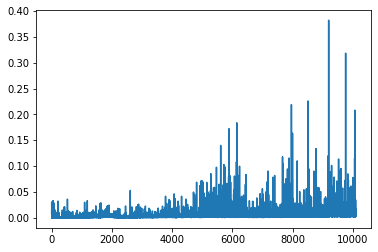

In [5]:
plt.plot(range(len(losses)), losses)
plt.show()

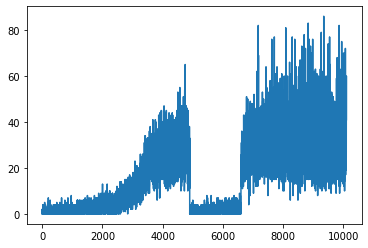

In [6]:
plt.plot(range(len(rewards)), rewards)
plt.show()

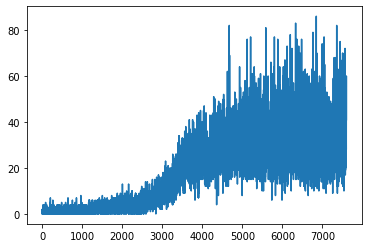

In [9]:
rewards_correct = rewards[:4100] + rewards[6600:]
# Correction because of model checkpointing flaw

plt.plot(range(len(rewards_correct)), rewards_correct)
plt.show()

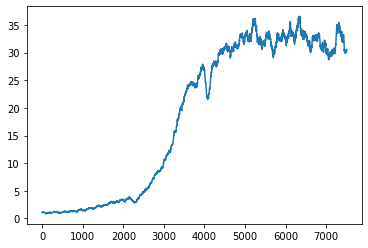

In [11]:
moving_avg_window = 100
averaged_rewards = np.convolve(rewards_correct, np.ones(moving_avg_window), 'valid') / moving_avg_window

plt.plot(range(len(averaged_rewards)), averaged_rewards)
plt.show()

In [18]:
eval_reward = 0
for _ in range(moving_avg_window):
    _R = agent.evaluate()
    print(_R)
    eval_reward += _R
eval_reward /= moving_avg_window

print(eval_reward)

26.0
44.0
32.0
39.0
42.0
50.0
47.0
26.0
34.0
44.0
40.0
25.0
35.0
31.0
28.0
21.0
29.0
34.0
21.0
41.0
32.0
26.0
29.0
24.0
24.0
26.0
26.0
26.0
15.0
29.0
31.0
22.0
49.0
33.0
29.0
26.0
25.0
32.0
32.0
39.0
39.0
26.0
22.0
28.0
52.0
42.0
20.0
39.0
32.0
27.0
18.0
23.0
40.0
40.0
34.0
49.0
23.0
41.0
26.0
29.0
13.0
21.0
34.0
23.0
35.0
27.0
17.0
17.0
44.0
38.0
41.0
47.0
41.0
42.0
25.0
31.0
42.0
38.0
26.0
14.0
37.0
21.0
35.0
34.0
8.0
22.0
46.0
23.0
43.0
20.0
33.0
25.0
34.0
17.0
30.0
25.0
39.0
42.0
32.0
50.0
31.46
